In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import Functions

In [13]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score,make_scorer,f1_score
from scipy.stats import ks_2samp

In [14]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import warnings

In [ ]:
# Loading the cleaned dataset for spam classification from a CSV file
df = pd.read_csv("/Users/user/Documents/Spam_Detection/Data/new_data_clear.csv")  # Replace with your path

# Dataset description
- The dataset contains preprocessed text messages labeled as spam (1) or non-spam (0).
- Cleaning steps include removing noise, fixing casing, and eliminating irrelevant symbols.
- This step reads the cleaned data to prepare for modeling.

In [ ]:
# Stratified sampling to create a balanced subset for training and testing
N = 4000  # Total number of rows desired

Stratified_Sample = (
    df.groupby('label', group_keys=False)  # Group data by label (spam or not)
    .apply(lambda x: x.sample(int(np.rint(N * len(x) / len(df)))))  # Sample proportionally from each class
    .sample(frac=1)  # Shuffle the rows randomly after sampling
    .reset_index(drop=True)  # Reset index after shuffle
)
df = Stratified_Sample

C:\Users\user\AppData\Local\Temp\ipykernel_13404\651812778.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df)))))


In [ ]:
# Separating features and labels
X = df['body']  # Text messages as features
Y = df['label']  # Corresponding spam labels (0 or 1)

In [19]:
print(X)

0       py lib 0.9.1: bugfix release\n================...
1       Terry Reedy wrote:\n> Some people write\n>    ...
2       Lotfi, hope this reply finds you well. As I re...
3       See Marc Victor's Litigation Risk Analysis: ht...
4       -----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...
                              ...                        
3995    When I noticed first increase in its length I ...
3996    Send TuxOnIce-users mailing list submissions t...
3997    \nYour neighbor has issued you a greeting at B...
3998    -----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...
3999     try,  medicine Worldwide Shipping check out here
Name: body, Length: 4000, dtype: object


In [20]:
X.shape

(4000,)

In [21]:
Y.shape

(4000,)

In [ ]:
X=np.array(Functions.change_format(X)) #cf Functions File

In [23]:
print(X)

['py lib bugfix release py lib team released version py lib library aiming support agile test driven python development various level mostly bugfix release couple new feature sneaked important change reduced number thread used py execnet new functionality authentication export locking py path subversion apis stability segfault fix execnet numerous small fix py test rsession experimental pluggable session generative test feature fix py test core added py misc killproc allows killing process flavour window unix complete list change see doc change txt source package download install http codespeak net py download html documentation api http codespeak net py index html work py lib partially funded european union ist programme http merlinux de within pypy project best fun let u know think holger krekel maciej fijalkowski carl friedrich bolz guido wesdorp http mail python org mailman listinfo python announce list support python software foundation http www python org psf donation html'
 'ter

In [ ]:
# Convert text data into numeric features using Count Vectorizer (Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer

tfidf = CountVectorizer()  # Initialize vectorizer
X = tfidf.fit_transform(X)  # Fit on text and transform to sparse matrix of token counts

# Feature Extraction Explanation
- Text data must be converted to a numerical format for machine learning algorithms.
- CountVectorizer transforms text into a matrix of token counts (Bag of Words model).
- This matrix is sparse and represents the frequency of words without considering order.

In [25]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 325658 stored elements and shape (4000, 35501)>
  Coords	Values
  (0, 24718)	11
  (0, 17779)	4
  (0, 3770)	2
  (0, 25849)	2
  (0, 30391)	1
  (0, 25850)	1
  (0, 33023)	1
  (0, 17802)	1
  (0, 677)	1
  (0, 29804)	2
  (0, 587)	1
  (0, 30581)	4
  (0, 8472)	1
  (0, 24781)	5
  (0, 7568)	1
  (0, 32863)	1
  (0, 17716)	1
  (0, 20089)	1
  (0, 6249)	1
  (0, 20855)	2
  (0, 10917)	2
  (0, 28530)	1
  (0, 14883)	1
  (0, 4659)	3
  (0, 25634)	1
  :	:
  (3998, 18058)	1
  (3998, 1838)	1
  (3998, 33314)	1
  (3998, 21978)	1
  (3998, 18483)	1
  (3998, 22919)	1
  (3998, 11082)	1
  (3998, 16190)	1
  (3998, 17263)	1
  (3998, 21596)	1
  (3998, 35394)	1
  (3998, 34329)	1
  (3998, 31989)	1
  (3998, 6745)	1
  (3998, 25136)	1
  (3998, 26327)	1
  (3998, 16530)	1
  (3998, 2347)	1
  (3998, 23221)	1
  (3998, 12229)	1
  (3999, 4743)	1
  (3999, 31574)	1
  (3999, 34285)	1
  (3999, 27957)	1
  (3999, 19238)	1


In [34]:
X.shape

(4000, 35501)

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Defining Machine Learning models to train and compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XgBoostclassifier": xgb.XGBClassifier()
}

# Models Overview
- Logistic Regression: A linear model suitable for binary classification.
- Naive Bayes: Probabilistic model ideal for text classification.
- Random Forest: Ensemble of decision trees to improve accuracy.
- K-Nearest Neighbors: Classifies based on proximity of samples.
- XGBoost: Gradient boosting approach known for high performance.

In [ ]:
# Train and evaluate the models using a custom training function
Functions.train_model(models, X_train, y_train, X_test, y_test)

Model: Logistic Regression
, Accuracy_Score: 0.98125
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       356
           1       0.97      1.00      0.98       444

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Confusion Matrix: 
 [[341  15]
 [  0 444]]
Model: Naive Bayes
, Accuracy_Score: 0.9325
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       356
           1       0.99      0.88      0.94       444

    accuracy                           0.93       800
   macro avg       0.93      0.94      0.93       800
weighted avg       0.94      0.93      0.93       800

Confusion Matrix: 
 [[354   2]
 [ 52 392]]
Model: Random Forest
, Accuracy_Score: 0.985
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       356
         

# Model Training & Evaluation
- This function trains each model on the training data.
- Evaluates performance on test data using metrics such as Accuracy, Precision, Recall, F1-score.
- Prints classification reports and confusion matrices for detailed analysis.

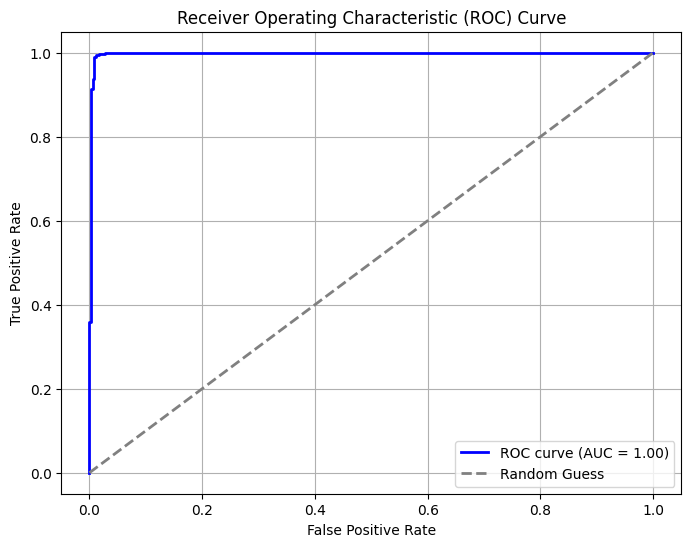

ROC-AUC Score for Logistic Regression: 0.9977


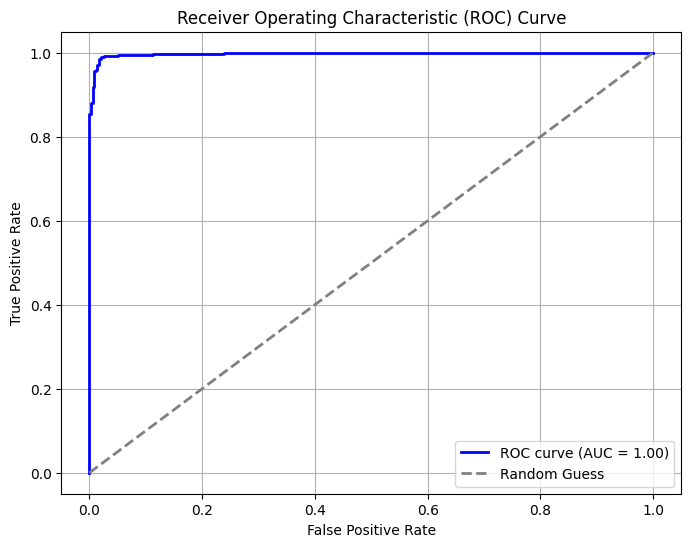

ROC-AUC Score for Naive Bayes: 0.9979


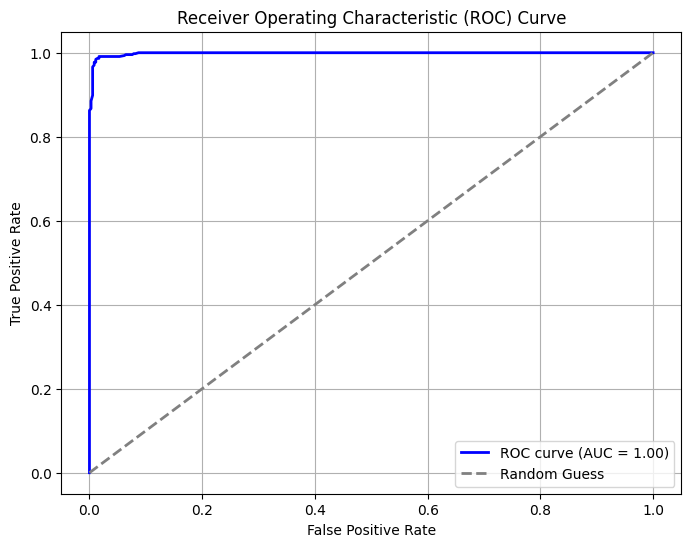

ROC-AUC Score for Random Forest: 0.9986


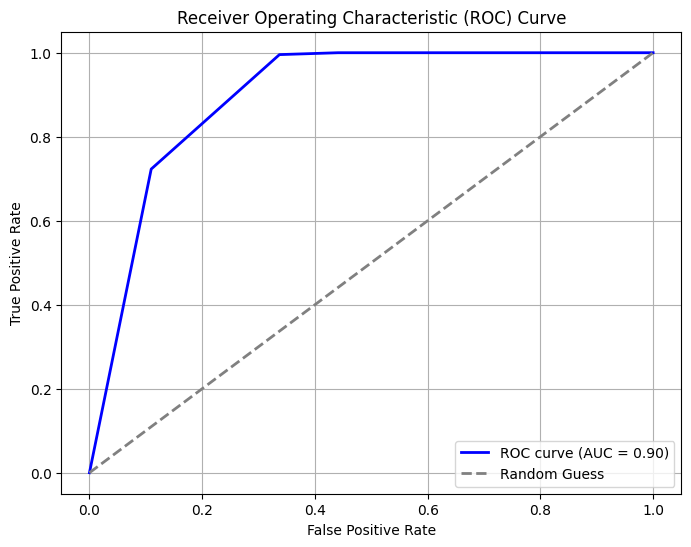

ROC-AUC Score for KNN: 0.8978


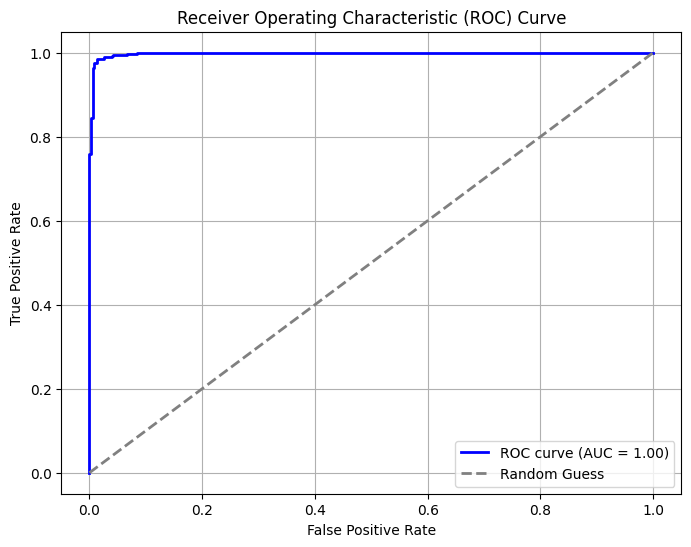

ROC-AUC Score for XgBoostclassifier: 0.9981


In [ ]:
Functions.roc_plot(models,X_test, y_test)

### Hyperparameters Optimisation (GridSearch)

In [30]:
scoring = { 'accuracy': make_scorer(accuracy_score), 'f1-score': make_scorer(f1_score) }

In [31]:
xgb_gridsearch_grid = { "n_estimators": [100, 500, 1000],
                    "learning_rate": [0.1, 0.05, 0.01],
                    "max_depth": [2, 8, 16, 64, 128], 
                    "colsample_bytree": [0.3, 0.8, 1],
                    "gamma": [0,1,5],
                    'reg_alpha': [ 0.01, 0.1, 1],          
                    'reg_lambda': [0.1, 1] } 

knn_gridsearch_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

lr_gridsearch_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 50, 10, 1, 0.1, 0.01, 0.001],
    'max_iter': [100,250, 500, 750, 1000, 2500, 5000],
    'solver': ['liblinear', 'saga']
    
    }

rf_gridsearch_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 8, 16, 32, 64, 128],
    'min_samples_split': [2, 4, 8, 16, 24],
    'min_samples_leaf': [1, 2, 5, 10, 15, 30],
}

NB_gridsearch_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],  
    'fit_prior': [True, False],  
    'force_alpha': [True, False]  
}




In [32]:
'''models = {
    "Logistic Regression":GridSearchCV(
                        estimator=LogisticRegression(), 
                        param_grid=lr_gridsearch_grid,
                        cv=5, 
                        scoring= scoring,  
                        refit="accuracy",  
                        verbose=0, 
                        n_jobs=-1,
                         ),

    "Naive Bayes":GridSearchCV(
                  estimator=MultinomialNB(),
                  param_grid=NB_gridsearch_grid, 
                  cv=5, 
                  scoring=scoring, 
                  refit='accuracy',
                  verbose=0, 
                  n_jobs=-1),

    "Random Forest":GridSearchCV(
                     estimator=RandomForestClassifier(), 
                     param_grid=rf_gridsearch_grid,
                     cv=5,
                     scoring=scoring,
                     refit='accuracy',
                     verbose=0,
                     n_jobs=-1,
                     ),

    "KNN":GridSearchCV(
            estimator=KNeighborsClassifier(),   
            param_grid=knn_gridsearch_grid, 
            cv=5,  
            scoring=scoring, 
            refit='accuracy', 
            verbose=0,
            n_jobs=-1,  
            ),

    "XgBoostclassifier": GridSearchCV(
                        estimator=xgb.XGBClassifier(), 
                        param_grid=xgb_gridsearch_grid,
                        cv=5,
                        scoring=scoring,
                        refit='accuracy',
                        verbose=0,
                        n_jobs=-1,
                        )} '''

'models = {\n    "Logistic Regression":GridSearchCV(\n                        estimator=LogisticRegression(), \n                        param_grid=lr_gridsearch_grid,\n                        cv=5, \n                        scoring= scoring,  \n                        refit="accuracy",  \n                        verbose=0, \n                        n_jobs=-1,\n                         ),\n\n    "Naive Bayes":GridSearchCV(\n                  estimator=MultinomialNB(),\n                  param_grid=NB_gridsearch_grid, \n                  cv=5, \n                  scoring=scoring, \n                  refit=\'accuracy\',\n                  verbose=0, \n                  n_jobs=-1),\n\n    "Random Forest":GridSearchCV(\n                     estimator=RandomForestClassifier(), \n                     param_grid=rf_gridsearch_grid,\n                     cv=5,\n                     scoring=scoring,\n                     refit=\'accuracy\',\n                     verbose=0,\n                     

In [33]:
#Functions.train_model(models,X_train,y_train,X_test,y_test)

# Conclusion

This notebook compared multiple classical and advanced machine learning models for spam detection in text messages. 

Random Forest and XGBoost classifiers demonstrated superior performance, highlighting the strength of ensemble methods.

Future improvements could involve using deep learning techniques such as transformers or fine-tuned language models to further boost accuracy.